## Import Libraries

In [1]:
# Import Libraries

import numpy as np
import pandas as pd

# Exploratory dataset

import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud
from wordcloud import WordCloud, STOPWORDS , ImageColorGenerator

# Text Preprocessing

import re
from nltk.tokenize import word_tokenize
import nltk.stem as stemmer
from nltk.stem.porter import *

# Metrics and Validation

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Embedding Layer

import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Embedding, TextVectorization, GlobalAveragePooling1D, Input, LSTM, GRU, Dropout, Dense

from urllib import request
from PIL import Image

import gensim
from gensim.models import Word2Vec

from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory

C:\Users\asus\anaconda3\envs\envir\lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,


## Data Loading

In [2]:
data = pd.read_csv('Dataset/baru.csv')
data.head()

,Title,Website,Phone Number,Category,Reviews,Rating,Longitude,Latitude,Facility Wifi,Facility Projector,...,Facility Whiteboard,Facility AV Equipment,Facility Stationeries,Harga,Kapasitas,Size Room,Address,Kabupaten,Review,Image
0,Ambhara Meeting Room,https://ambharahotel.com/meetings/,212700888,Meeting room,5,4.4,106.803342,-6.243314,Yes,Yes,...,No,Yes,Yes,200000,20,Medium,Jl. Iskandarsyah II. RT.5/RW.2. Melawai. Kec. ...,Jakarta Selatan,Karena letak strategis didepan terminal blok d...,1.jpg
1,Regus - Jakarta. The Vida,http://regus.com,2129778000,Office space rental agency,8,4.5,106.759558,-6.191211,Yes,Yes,...,No,No,Yes,190000,20,Medium,Jl. Raya Pejuangan No. 8 The Vida 7th floor. R...,Jakarta Barat,"Ruangan bersih, nyaman serta pelayananya ramah...",2.jpg
2,Wellspaces Kemang Coworking Space & Serviced O...,http://wellspaces.co,81318391205,Coworking space,345,4.6,106.813491,-6.254505,No,Yes,...,No,No,No,150000,15,Small,Jl. Bangka XII No.4. RT.2/RW.7. Pela Mampang. ...,Jakarta Selatan,"Tempatnya asik, ke sini karena ada event ngump...",3.jpg
3,US Coworking Space - PIK Avenue,http://betterwithus.id,8111085505,Coworking space,7496,4.3,106.740378,-6.109718,Yes,No,...,No,No,No,95000,12,Small,PIK Avenue. Level 6. Jl. Pantai Indah Kapuk. R...,Jakarta Utara,Tempatnya sepi enak buat kerja wifinya juga ke...,4.jpg
4,MARQUEE - Equity Tower,http://marqueeoffices.com,2175999999,Office space rental agency,198,4.4,106.808661,-6.226844,Yes,Yes,...,Yes,No,Yes,250000,20,Medium,Equity Tower Building 35-37th floor. Jl. Jend....,Jakarta Selatan,"Nice looking, bersih aman sudah pasti, yg lu...",5.jpg


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Title                  64 non-null     object 
 1   Website                64 non-null     object 
 2   Phone Number           64 non-null     int64  
 3   Category               64 non-null     object 
 4   Reviews                64 non-null     int64  
 5   Rating                 64 non-null     float64
 6   Longitude              64 non-null     float64
 7   Latitude               64 non-null     float64
 8   Facility Wifi          64 non-null     object 
 9   Facility Projector     64 non-null     object 
 10  Facility Food & Drink  64 non-null     object 
 11  Facility Whiteboard    64 non-null     object 
 12  Facility AV Equipment  64 non-null     object 
 13  Facility Stationeries  64 non-null     object 
 14  Harga                  64 non-null     int64  
 15  Kapasita

## Exploratory Data Analysis (EDA)

<AxesSubplot:xlabel='Rating', ylabel='count'>

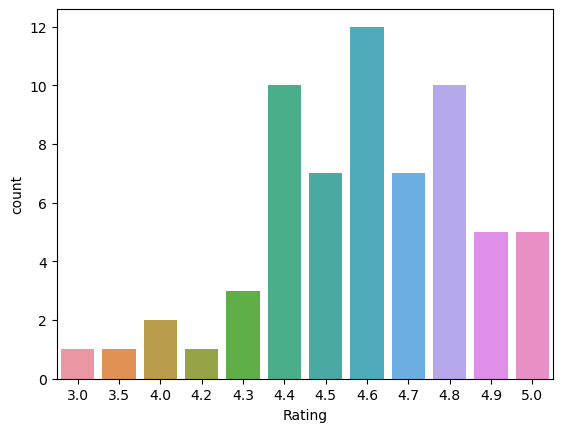

In [4]:
sns.countplot(x='Rating', data=data)

<AxesSubplot:ylabel='Rating'>

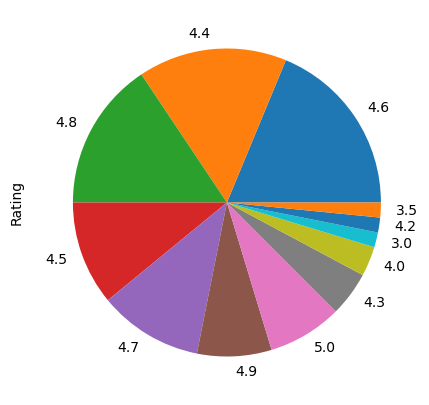

In [5]:
data['Rating'].value_counts().plot(kind='pie', figsize=(10,5))

In [6]:
data['Rating'].value_counts()

4.6    12
4.4    10
4.8    10
4.5     7
4.7     7
4.9     5
5.0     5
4.3     3
4.0     2
3.0     1
4.2     1
3.5     1
Name: Rating, dtype: int64

In [8]:
from wordcloud import WordCloud

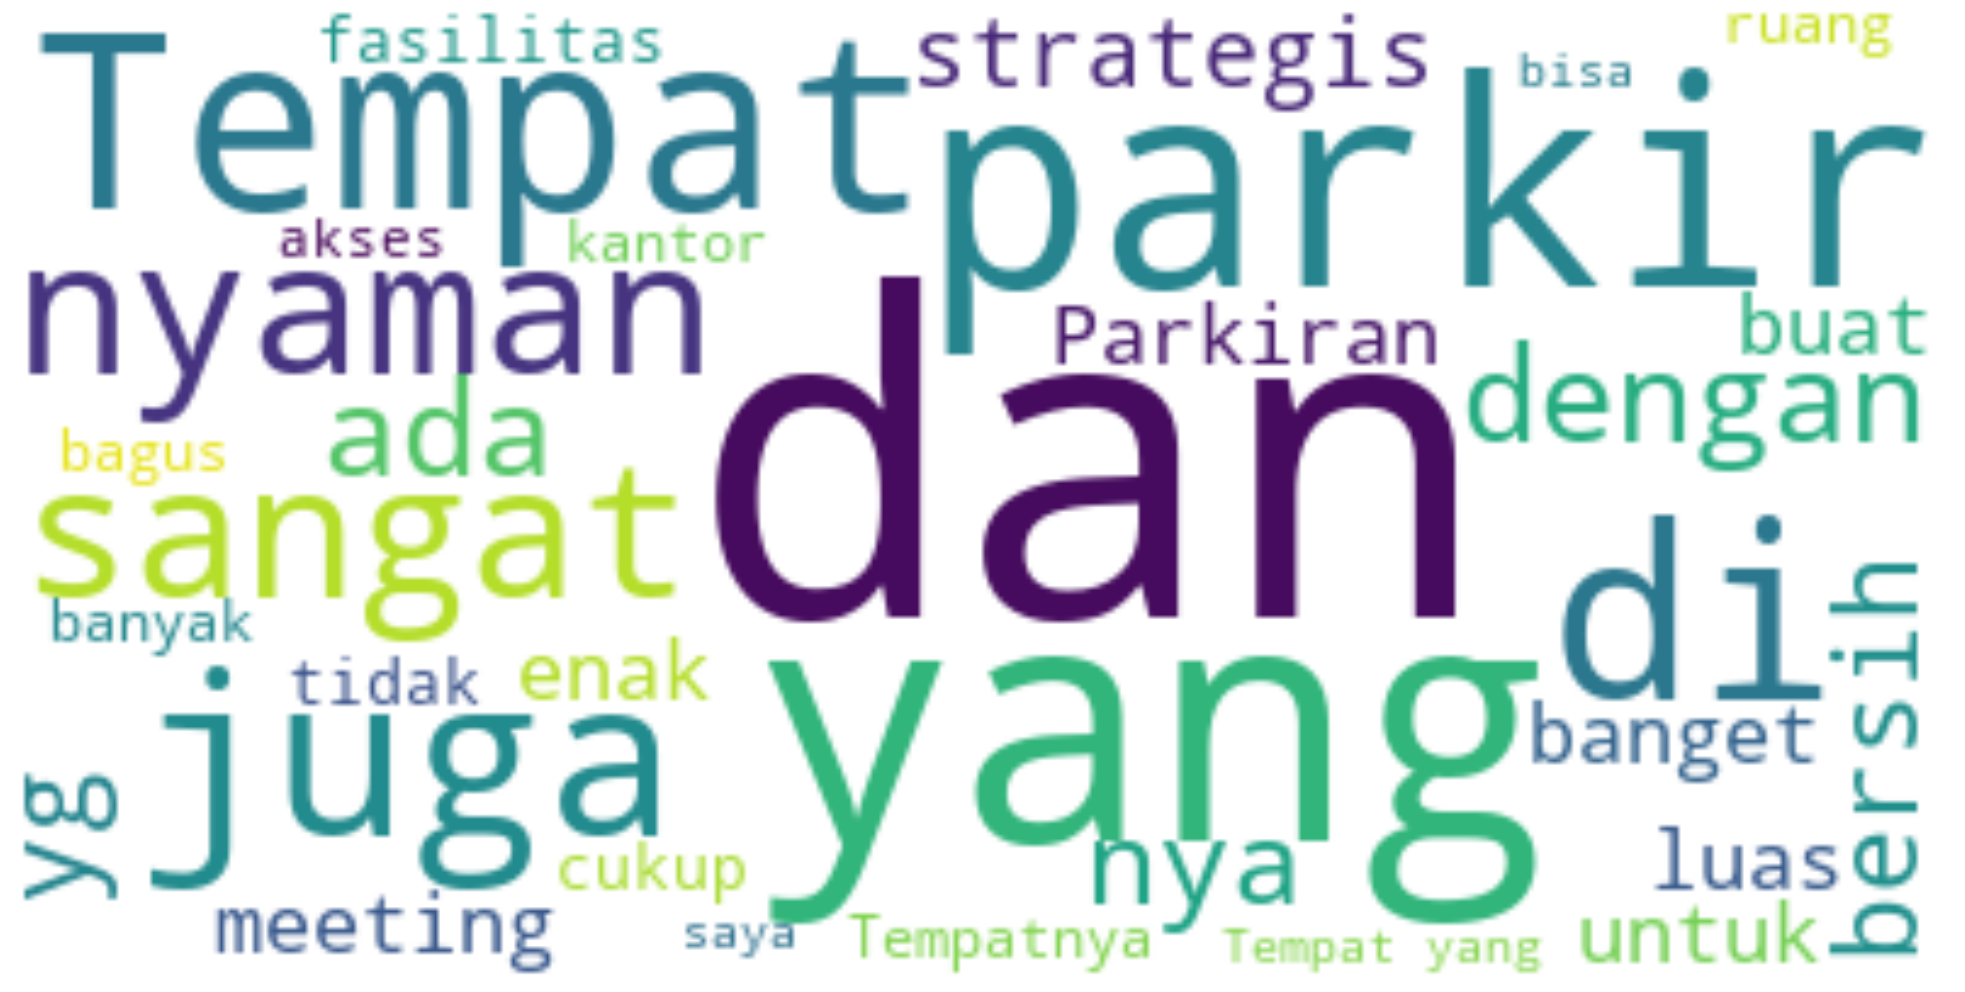

In [12]:
corpus = ''.join(data['Review'])
word_cloud = WordCloud(max_words=100, background_color='white', min_font_size=10).generate(corpus)

plt.figure(figsize=(20,10))
plt.imshow(word_cloud, interpolation='bilinear')
plt.tight_layout(pad=0)
plt.axis('off')
plt.show()

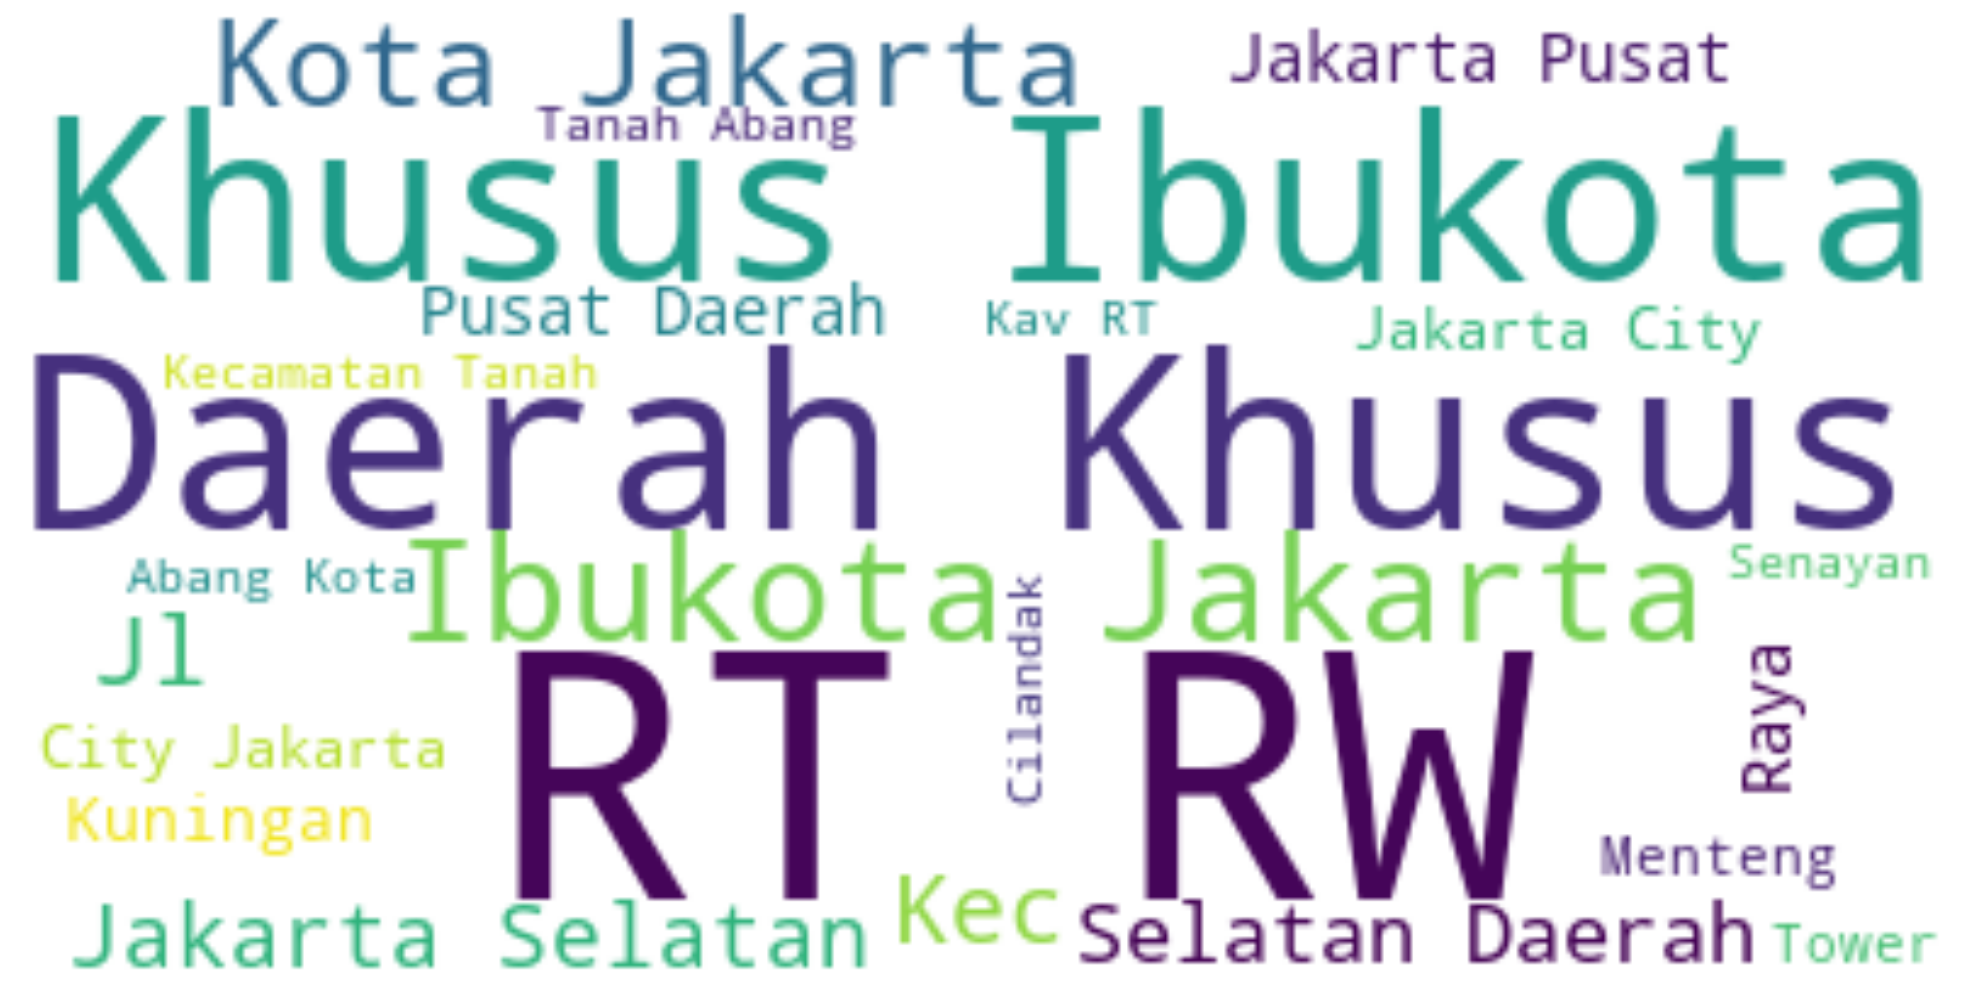

In [14]:
corpus = ''.join(data['Address'])
word_cloud = WordCloud(max_words=100, background_color='white', min_font_size=10).generate(corpus)

plt.figure(figsize=(20,10))
plt.imshow(word_cloud, interpolation='bilinear')
plt.tight_layout(pad=0)
plt.axis('off')
plt.show()

## Data preprocessing

### Preprocessing All Documents

In [15]:
def clean_text(text):
    emoj = re.compile('['
                      u"\U0001F600-\U0001F64F"    
                      u"\U0001F300-\U0001F5FF"    
                      u"\U0001F680-\U0001F6FF"   
                      u"\U0001F1E0-\U0001F1FF"    
                      u"\U00002500-\U00002BEF"  
                      u"\U00002702-\U000027B0"
                      u"\U00002702-\U000027B0"
                      u"\U000024C2-\U0001F251"
                      u"\U0001f926-\U0001f937"
                      u"\U00010000-\U0010ffff"
                      u"\u2640-\u2642" 
                      u"\u2600-\u2B55"
                      u"\u200d"
                      u"\u23cf"
                      u"\u23e9"
                      u"\u231a"
                      u"\ufe0f"                   
                      u"\u3030"
                      ']+', re.UNICODE)
    
    text = text.lower()
    text = re.sub(emoj, '', text)
    text = re.sub(r'(.)\1{2,}', r'\1', text)                                                            # mengubah huruf berulang diatas 2 kali menjadi 1 saja
    text = re.sub("[0-9]", " ", text)                                                                   # remove numbers
    text = re.sub("(Diterjemahkan oleh Google)", " ", text)                                                                   
    text = re.sub("'s", " ", text) 
    text = re.sub("[¹²³¹⁰ⁱ⁴⁵⁶⁷⁸⁹⁺⁻⁼⁽⁾ⁿ]", "", text)                                                     # remove power character
    text = re.sub("[^A-Za-z\s']"," ", text)  
    text = re.sub("[^\w\s]*[_,.!?#&;:><+-/)/(\'\"]", " ", text)                                         # remove bukan string dan whitespace
    text = ' '.join([re.sub(r'nya', '', i) for i in text.split()])                                 # menghapus akhir kata 'nya' atau 'ny'
    text = re.sub(" +", " ", text.strip())                                                              # Remove unnecessary white space
    return text

def cleaned(data):
    data['Review_preprocessed'] = data['Review'].apply(clean_text)
    return data

In [16]:
cleaned(data)

,Title,Website,Phone Number,Category,Reviews,Rating,Longitude,Latitude,Facility Wifi,Facility Projector,...,Facility AV Equipment,Facility Stationeries,Harga,Kapasitas,Size Room,Address,Kabupaten,Review,Image,Review_preprocessed
0,Ambhara Meeting Room,https://ambharahotel.com/meetings/,212700888,Meeting room,5,4.4,106.803342,-6.243314,Yes,Yes,...,Yes,Yes,200000,20,Medium,Jl. Iskandarsyah II. RT.5/RW.2. Melawai. Kec. ...,Jakarta Selatan,Karena letak strategis didepan terminal blok d...,1.jpg,karena letak strategis didepan terminal blok d...
1,Regus - Jakarta. The Vida,http://regus.com,2129778000,Office space rental agency,8,4.5,106.759558,-6.191211,Yes,Yes,...,No,Yes,190000,20,Medium,Jl. Raya Pejuangan No. 8 The Vida 7th floor. R...,Jakarta Barat,"Ruangan bersih, nyaman serta pelayananya ramah...",2.jpg,ruangan bersih man serta pelayana ramah great ...
2,Wellspaces Kemang Coworking Space & Serviced O...,http://wellspaces.co,81318391205,Coworking space,345,4.6,106.813491,-6.254505,No,Yes,...,No,No,150000,15,Small,Jl. Bangka XII No.4. RT.2/RW.7. Pela Mampang. ...,Jakarta Selatan,"Tempatnya asik, ke sini karena ada event ngump...",3.jpg,tempat asik ke sini karena ada event ngumpul p...
3,US Coworking Space - PIK Avenue,http://betterwithus.id,8111085505,Coworking space,7496,4.3,106.740378,-6.109718,Yes,No,...,No,No,95000,12,Small,PIK Avenue. Level 6. Jl. Pantai Indah Kapuk. R...,Jakarta Utara,Tempatnya sepi enak buat kerja wifinya juga ke...,4.jpg,tempat sepi enak buat kerja wifi juga kencang ...
4,MARQUEE - Equity Tower,http://marqueeoffices.com,2175999999,Office space rental agency,198,4.4,106.808661,-6.226844,Yes,Yes,...,No,Yes,250000,20,Medium,Equity Tower Building 35-37th floor. Jl. Jend....,Jakarta Selatan,"Nice looking, bersih aman sudah pasti, yg lu...",5.jpg,nice looking bersih aman sudah pasti yg luar b...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,Kecapi Meeting Room Santika Hotel TMII,https://www.mysantika.com/,2129378500,Hotel,9,4.7,106.886695,-6.302934,Yes,Yes,...,Yes,Yes,500000,60,Large,"Jl. Hankam Raya No.46, RT.1/RW.2, Ceger, Kec. ...",Jakarta Timur,Ruang meeting lumayan besar Dan AC nya dingin ...,60.jpg,ruang meeting lumayan besar dan ac dingin bang...
60,Balairung Meeting Room,http://balairung-hotel.co.id/,2185917217,Hotel,7,4.4,106.854881,-6.199693,Yes,Yes,...,Yes,Yes,400000,100,Large,"Jl. Matraman Raya No.19, RT.1/RW.1, Palmeriam,...",Jakarta Timur,"Di depan gedung ini terdapat halte busway, tem...",61.jpg,di depan gedung ini terdapat halte busway temp...
61,iOffice - Jakarta (Virtual Office | Serviced O...,http://ioffice.co.id/,81212341673,Office space rental agency,3,5.0,106.885666,-6.192791,Yes,Yes,...,No,No,120000,20,Medium,"Jl. Pemuda No.15, RT.8/RW.4, Rawamangun, Kec. ...",Jakarta Timur,"Tempatnya strategis, dan nyaman, harga worth it.",62.jpg,tempat strategis dan man harga worth it
62,Vin & Co.Working,https://vincoworking.id/,81386468028,Meeting room,32,4.9,106.882750,-6.226598,Yes,Yes,...,No,No,100000,16,Small,Jl. Raya Cipinang Besar Selatan No. 8 - Gedung...,Jakarta Timur,"Lokasi sangat strategis, dan mudah dijangkau, ...",63.jpg,lokasi sangat strategis dan mudah dijangkau te...


In [17]:
data.tail()

,Title,Website,Phone Number,Category,Reviews,Rating,Longitude,Latitude,Facility Wifi,Facility Projector,...,Facility AV Equipment,Facility Stationeries,Harga,Kapasitas,Size Room,Address,Kabupaten,Review,Image,Review_preprocessed
59,Kecapi Meeting Room Santika Hotel TMII,https://www.mysantika.com/,2129378500,Hotel,9,4.7,106.886695,-6.302934,Yes,Yes,...,Yes,Yes,500000,60,Large,"Jl. Hankam Raya No.46, RT.1/RW.2, Ceger, Kec. ...",Jakarta Timur,Ruang meeting lumayan besar Dan AC nya dingin ...,60.jpg,ruang meeting lumayan besar dan ac dingin bang...
60,Balairung Meeting Room,http://balairung-hotel.co.id/,2185917217,Hotel,7,4.4,106.854881,-6.199693,Yes,Yes,...,Yes,Yes,400000,100,Large,"Jl. Matraman Raya No.19, RT.1/RW.1, Palmeriam,...",Jakarta Timur,"Di depan gedung ini terdapat halte busway, tem...",61.jpg,di depan gedung ini terdapat halte busway temp...
61,iOffice - Jakarta (Virtual Office | Serviced O...,http://ioffice.co.id/,81212341673,Office space rental agency,3,5.0,106.885666,-6.192791,Yes,Yes,...,No,No,120000,20,Medium,"Jl. Pemuda No.15, RT.8/RW.4, Rawamangun, Kec. ...",Jakarta Timur,"Tempatnya strategis, dan nyaman, harga worth it.",62.jpg,tempat strategis dan man harga worth it
62,Vin & Co.Working,https://vincoworking.id/,81386468028,Meeting room,32,4.9,106.882750,-6.226598,Yes,Yes,...,No,No,100000,16,Small,Jl. Raya Cipinang Besar Selatan No. 8 - Gedung...,Jakarta Timur,"Lokasi sangat strategis, dan mudah dijangkau, ...",63.jpg,lokasi sangat strategis dan mudah dijangkau te...
63,Reneospace,https://www.instagram.com/reneospace/,2122088851,Coworking space,157,4.8,106.899056,-6.241558,Yes,No,...,No,No,100000,10,Small,"Jl. Pondok Bambu Batas Bambu No.14, RT.3/RW.12...",Jakarta Timur,"Tempatnya nyaman, Cocok untuk yang ingin menye...",64.jpg,tempat man cocok untuk yang ingin menyewa kant...


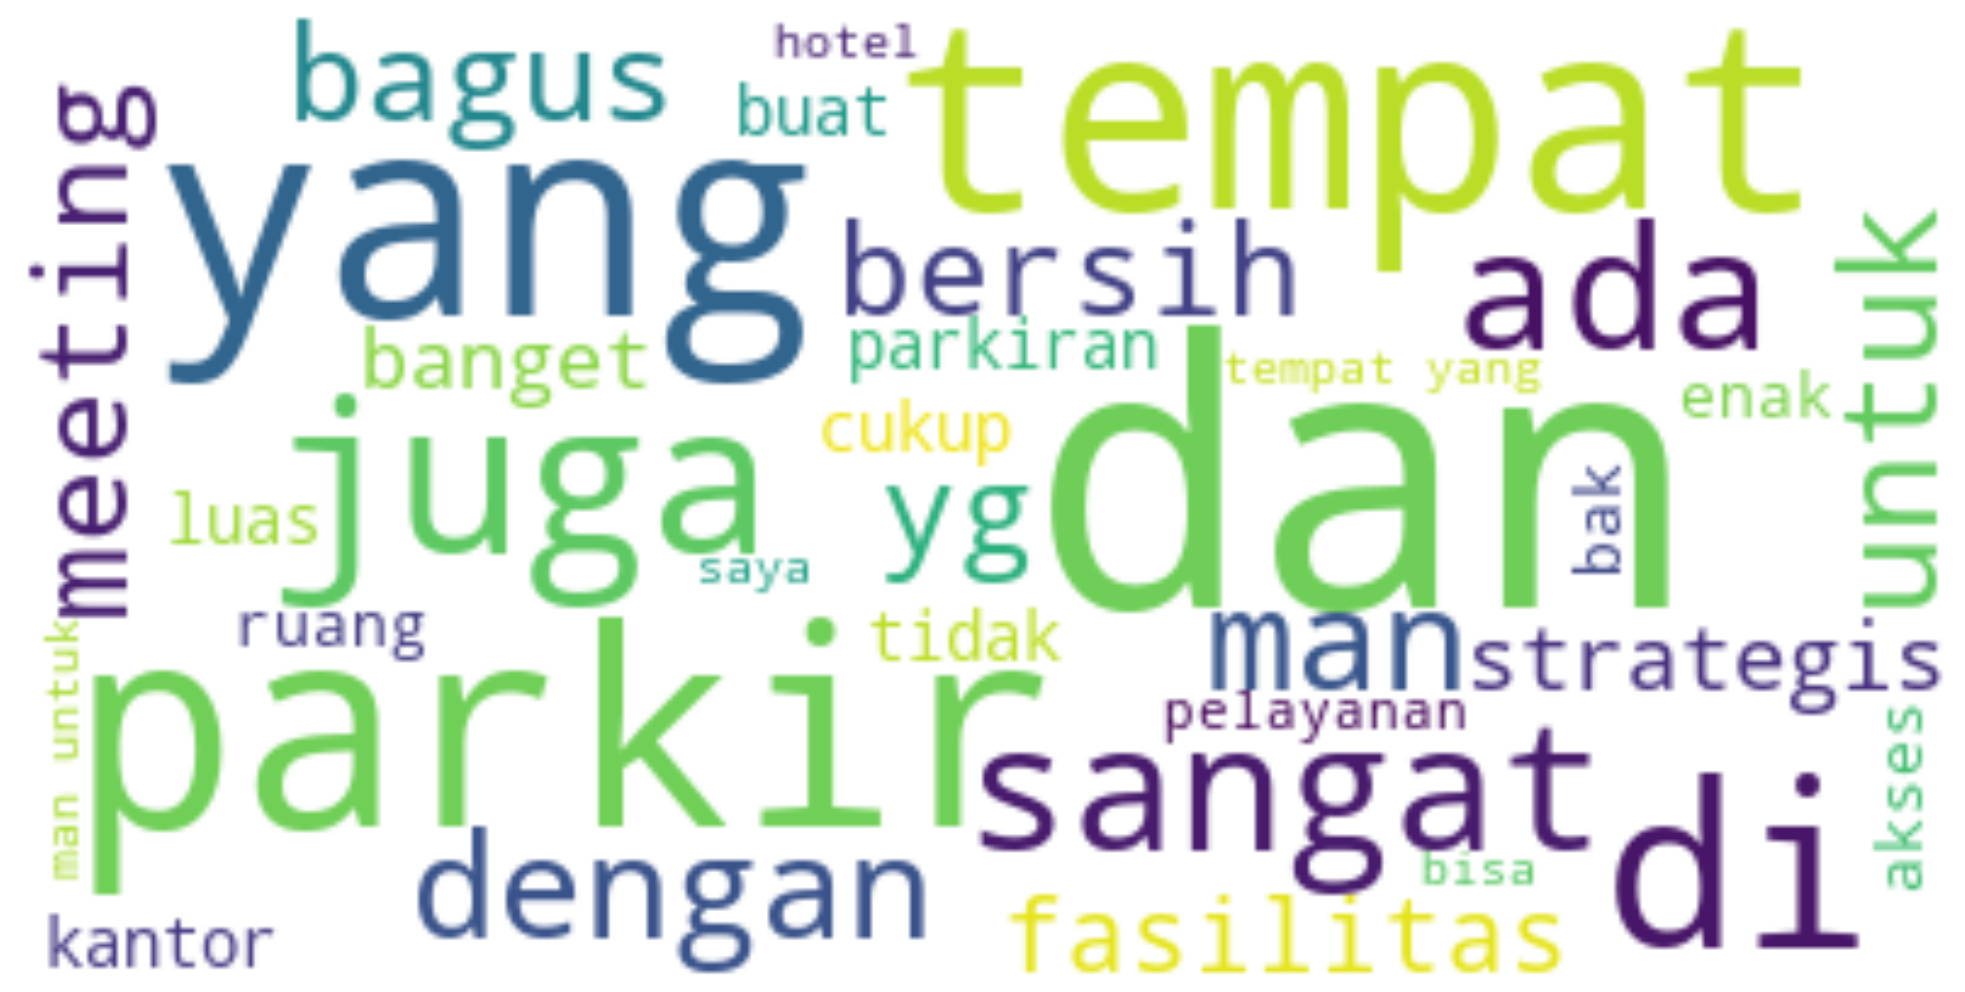

In [18]:
corpus = ''.join(data['Review_preprocessed'])
word_cloud = WordCloud(max_words=100, background_color='white', min_font_size=10).generate(corpus)

plt.figure(figsize=(20,10))
plt.imshow(word_cloud, interpolation='bilinear')
plt.tight_layout(pad=0)
plt.axis('off')
plt.show()

In [22]:
def stemmer_stopped(text):
    stemmer_factory = StemmerFactory()
    stemmer = stemmer_factory.create_stemmer()
    text = stemmer.stem(text)
    
    list_stopwords = set(stopwords.words('indonesian'))                             
    stopword_factory = StopWordRemoverFactory()                                     
    stopwords_sastrawi = set(stopword_factory.get_stop_words()) 
    list_stopwords = list_stopwords.union(stopwords_sastrawi)                       

    text = " ".join(w if w not in list_stopwords else '' for w in text.split())
    text = re.sub(" +", " ", text.strip())                                          
    
    return text

def clean_stopword(data):
    data['clean stopword'] = data['Review_preprocessed'].apply(stemmer_stopped)
    return data 

In [23]:
clean_stopword(data)
data.head()

,Title,Website,Phone Number,Category,Reviews,Rating,Longitude,Latitude,Facility Wifi,Facility Projector,...,Facility Stationeries,Harga,Kapasitas,Size Room,Address,Kabupaten,Review,Image,Review_preprocessed,clean stopword
0,Ambhara Meeting Room,https://ambharahotel.com/meetings/,212700888,Meeting room,5,4.4,106.803342,-6.243314,Yes,Yes,...,Yes,200000,20,Medium,Jl. Iskandarsyah II. RT.5/RW.2. Melawai. Kec. ...,Jakarta Selatan,Karena letak strategis didepan terminal blok d...,1.jpg,karena letak strategis didepan terminal blok d...,letak strategis terminal blok pusat belanja pa...
1,Regus - Jakarta. The Vida,http://regus.com,2129778000,Office space rental agency,8,4.5,106.759558,-6.191211,Yes,Yes,...,Yes,190000,20,Medium,Jl. Raya Pejuangan No. 8 The Vida 7th floor. R...,Jakarta Barat,"Ruangan bersih, nyaman serta pelayananya ramah...",2.jpg,ruangan bersih man serta pelayana ramah great ...,ruang bersih man pelayana ramah great office i...
2,Wellspaces Kemang Coworking Space & Serviced O...,http://wellspaces.co,81318391205,Coworking space,345,4.6,106.813491,-6.254505,No,Yes,...,No,150000,15,Small,Jl. Bangka XII No.4. RT.2/RW.7. Pela Mampang. ...,Jakarta Selatan,"Tempatnya asik, ke sini karena ada event ngump...",3.jpg,tempat asik ke sini karena ada event ngumpul p...,asik event ngumpul start up biar sharing welsp...
3,US Coworking Space - PIK Avenue,http://betterwithus.id,8111085505,Coworking space,7496,4.3,106.740378,-6.109718,Yes,No,...,No,95000,12,Small,PIK Avenue. Level 6. Jl. Pantai Indah Kapuk. R...,Jakarta Utara,Tempatnya sepi enak buat kerja wifinya juga ke...,4.jpg,tempat sepi enak buat kerja wifi juga kencang ...,sepi wifi kencang ukur kantor doownload cepat ...
4,MARQUEE - Equity Tower,http://marqueeoffices.com,2175999999,Office space rental agency,198,4.4,106.808661,-6.226844,Yes,Yes,...,Yes,250000,20,Medium,Equity Tower Building 35-37th floor. Jl. Jend....,Jakarta Selatan,"Nice looking, bersih aman sudah pasti, yg lu...",5.jpg,nice looking bersih aman sudah pasti yg luar b...,nice looking bersih aman yg akses lift gak rib...


In [24]:
data.to_csv('df_new1.csv', index=False)

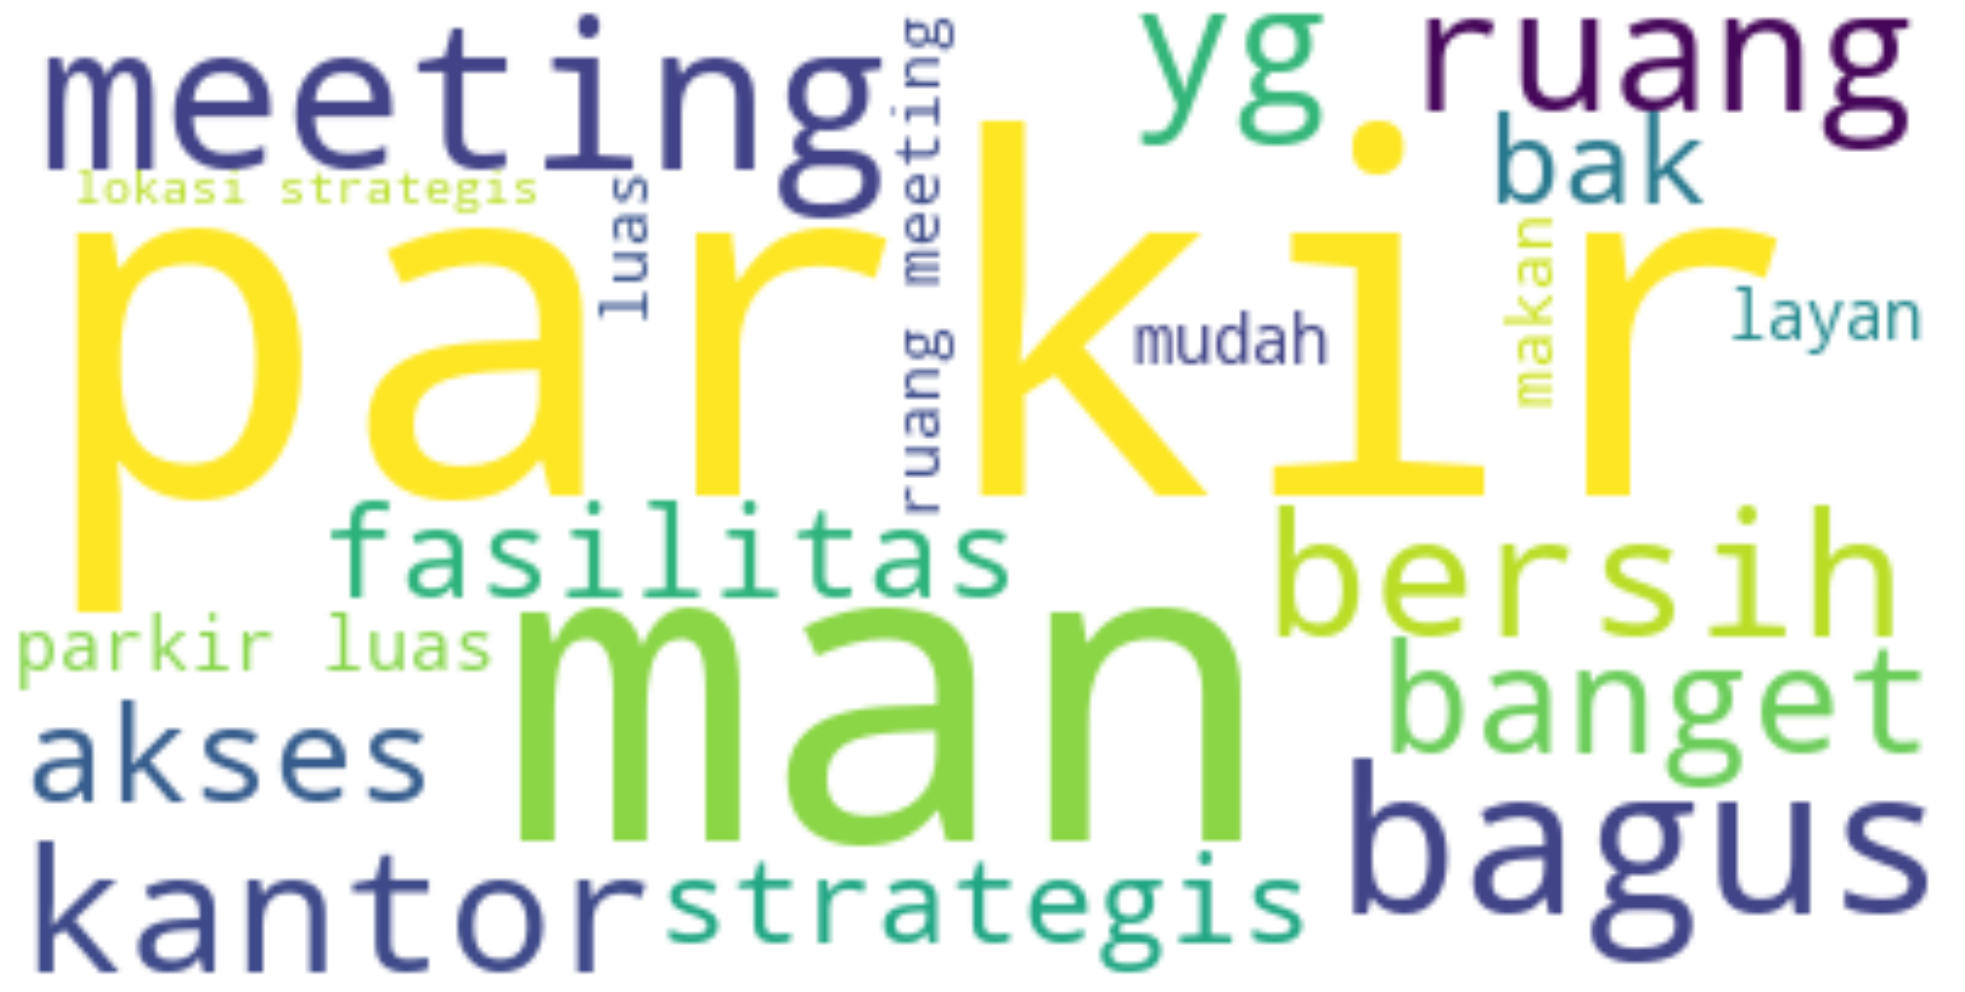

In [25]:
corpus = ''.join(data['clean stopword'])

word_cloud = WordCloud(max_words=100, background_color='white', min_font_size=10).generate(corpus)

plt.figure(figsize=(20,10))
plt.imshow(word_cloud, interpolation='bilinear')
plt.tight_layout(pad=0)
plt.axis('off')
plt.show()

## Modelling

In [26]:
data['Review_preprocessed'][0]

'karena letak strategis didepan terminal blok dan pusat belanja pasaraya ruangan man snack juga enak pelayan dan teknisi cukup sigap melayani tamu bagus'

In [27]:
text_reviews = data['Review_preprocessed'].apply(gensim.utils.simple_preprocess)
text_reviews

0     [karena, letak, strategis, didepan, terminal, ...
1     [ruangan, bersih, man, serta, pelayana, ramah,...
2     [tempat, asik, ke, sini, karena, ada, event, n...
3     [tempat, sepi, enak, buat, kerja, wifi, juga, ...
4     [nice, looking, bersih, aman, sudah, pasti, yg...
                            ...                        
59    [ruang, meeting, lumayan, besar, dan, ac, ding...
60    [di, depan, gedung, ini, terdapat, halte, busw...
61      [tempat, strategis, dan, man, harga, worth, it]
62    [lokasi, sangat, strategis, dan, mudah, dijang...
63    [tempat, man, cocok, untuk, yang, ingin, menye...
Name: Review_preprocessed, Length: 64, dtype: object

In [28]:
text_reviews = data['clean stopword'].apply(gensim.utils.simple_preprocess)
text_reviews

0     [letak, strategis, terminal, blok, pusat, bela...
1     [ruang, bersih, man, pelayana, ramah, great, o...
2     [asik, event, ngumpul, start, up, biar, sharin...
3     [sepi, wifi, kencang, ukur, kantor, doownload,...
4     [nice, looking, bersih, aman, yg, akses, lift,...
                            ...                        
59    [ruang, meeting, lumayan, ac, dingin, banget, ...
60                     [gedung, halte, busway, meeting]
61                   [strategis, man, harga, worth, it]
62    [lokasi, strategis, mudah, jangkau, man, akses...
63    [man, cocok, sewa, kantor, meeting, jakarta, t...
Name: clean stopword, Length: 64, dtype: object

In [29]:
model = Word2Vec(
    window=10,
    min_count=5,
    alpha=0.11,
    seed=10
)

In [30]:
model.build_vocab(text_reviews, progress_per=1000)

In [31]:
model.train(text_reviews, total_examples=model.corpus_count, epochs=model.epochs)

(2940, 12475)

In [35]:
model.wv.most_similar('meeting')

[('lokasi', 0.9994951486587524),
 ('yg', 0.9994644522666931),
 ('sempit', 0.9994427561759949),
 ('banget', 0.999428927898407),
 ('bagus', 0.9994199872016907),
 ('cepat', 0.9993992447853088),
 ('ruang', 0.9993895888328552),
 ('jalan', 0.9993756413459778),
 ('kopi', 0.9993755221366882),
 ('man', 0.9993615746498108)]